# Diabetic Retinopathy Prediction 

In [41]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
# Loading the .csv dataset

data = pd.read_csv("pronostico_dataset.csv", delimiter=";")
data

,ID,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,0,77.196340,85.288742,80.021878,79.957109,retinopathy
1,1,63.529850,99.379736,84.852361,110.382411,retinopathy
2,2,69.003986,111.349455,109.850616,100.828246,retinopathy
3,3,82.638210,95.056128,79.666851,87.066303,retinopathy
4,4,78.346286,109.154591,90.713220,92.511770,retinopathy
...,...,...,...,...,...,...
5995,5995,49.611850,94.857639,86.615671,107.643986,no_retinopathy
5996,5996,63.099686,100.039527,93.515186,104.971404,retinopathy
5997,5997,55.562243,98.421446,102.697875,120.875951,retinopathy
5998,5998,63.468956,106.809289,88.060631,106.052213,retinopathy


In [43]:
# Understanding the features:

# ID - identifying the patient. Will not be useful in the model.
# age - age of the patient. Could correlate with having Diabetic retinopathy or not.
# systolic_bp and diastolic_bp - blood pressure
# cholestoral

# prognosis - 1 if the patient has retinopathy and 0 if they don't.
# This is the target variable.

# EDA

In [4]:
# Inspecting the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            6000 non-null   int64  
 1   age           6000 non-null   float64
 2   systolic_bp   6000 non-null   float64
 3   diastolic_bp  6000 non-null   float64
 4   cholesterol   6000 non-null   float64
 5   prognosis     6000 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 281.4+ KB


In [5]:
#Checking for any missing values

data.isnull().sum()

ID              0
age             0
systolic_bp     0
diastolic_bp    0
cholesterol     0
prognosis       0
dtype: int64

In [6]:
#Checking for any duplicate rows

data.duplicated().value_counts()

False    6000
Name: count, dtype: int64

In [7]:
#No missing values or duplicate rows

In [8]:
# Summary of the dataset.

data.describe()

,ID,age,systolic_bp,diastolic_bp,cholesterol
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,2999.500000,60.464121,100.694822,90.505547,100.628255
std,1732.195139,8.564392,10.669267,9.648200,10.433915
min,0.000000,35.164761,69.675429,62.807105,69.967453
25%,1499.750000,54.371941,93.267420,83.641788,93.202373
50%,2999.500000,59.831159,100.119926,89.912429,100.060637
75%,4499.250000,65.809652,107.439501,96.682405,107.250829
max,5999.000000,103.279497,151.699660,133.456382,148.233544


# Visualization - Histogram

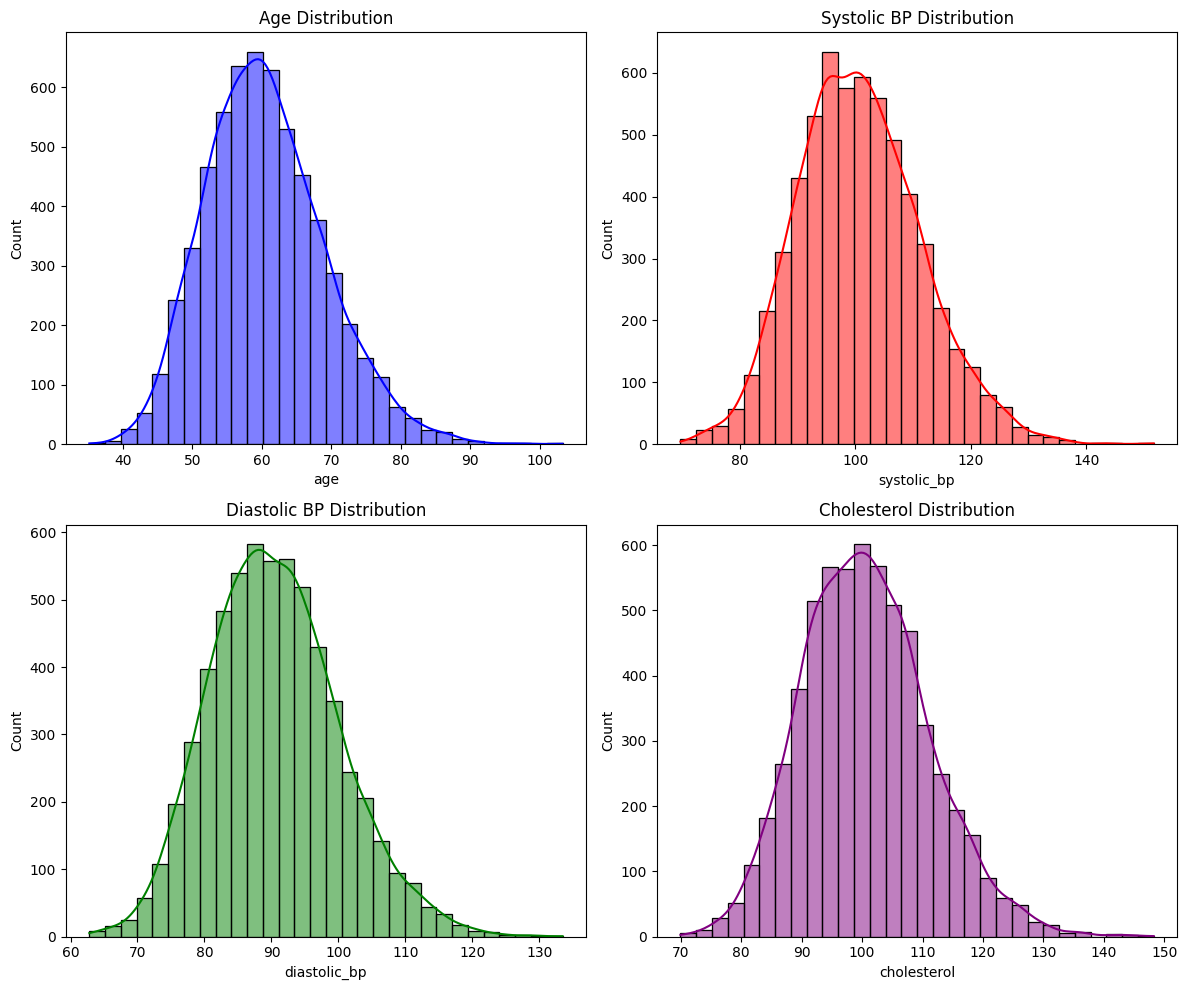

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(data['age'], bins=30, kde=True, ax=axes[0,0], color='blue').set_title('Age Distribution')
sns.histplot(data['systolic_bp'], bins=30, kde=True, ax=axes[0,1], color='red').set_title('Systolic BP Distribution')
sns.histplot(data['diastolic_bp'], bins=30, kde=True, ax=axes[1,0], color='green').set_title('Diastolic BP Distribution')
sns.histplot(data['cholesterol'], bins=30, kde=True, ax=axes[1,1], color='purple').set_title('Cholesterol Distribution')

plt.tight_layout()
plt.show()

In [10]:
# Observations:

# Seems like a little Right-skewed distribution, meaning more patients are older.

# Visualization - Boxplot

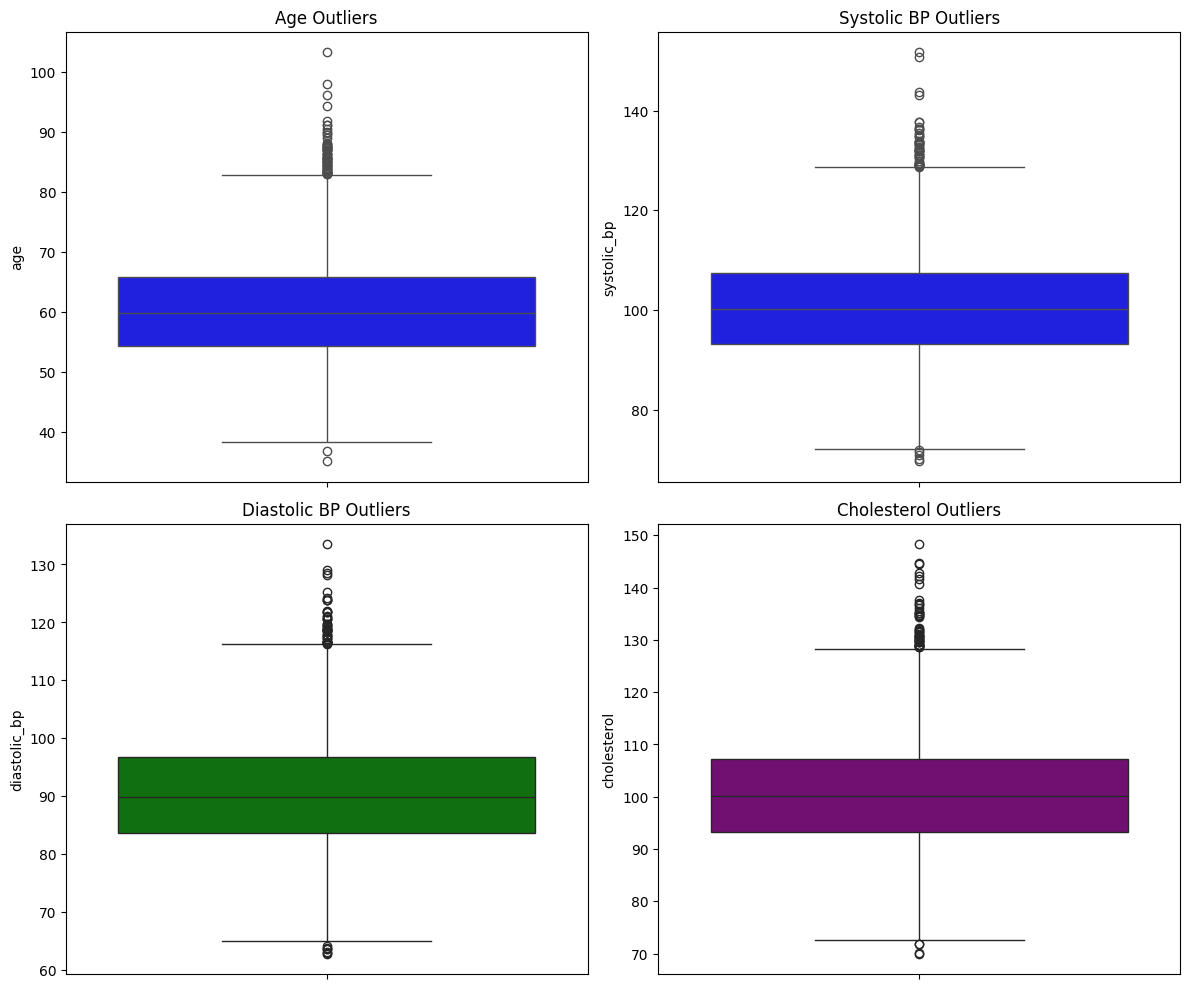

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.boxplot(y=data['age'], ax=axes[0, 0], color='blue').set(title='Age Outliers')
sns.boxplot(y=data['systolic_bp'], ax=axes[0, 1], color='blue').set(title='Systolic BP Outliers')
sns.boxplot(y=data['diastolic_bp'], ax=axes[1, 0], color='green').set(title='Diastolic BP Outliers')
sns.boxplot(y=data['cholesterol'], ax=axes[1, 1], color='purple').set(title='Cholesterol Outliers')

plt.tight_layout()
plt.show()

In [12]:
# Observations:

# Age can be seen above 100 years which should be checked.
# Systolic BP and Diastolic BP have a lot of outliers on the upper end i.e. very high blood pressure.
# Cholesterol also has a lot of outliers on the upper end.

In [44]:
# Function to remove outliers using IQR method
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = data[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Calculate IQR
    lower_bound = Q1 - 1.5 * IQR  # Lower bound for outliers
    upper_bound = Q3 + 1.5 * IQR  # Upper bound for outliers
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]  # Filter the DataFrame to keep only values within the range i.e., filter out the outliers.

In [45]:
# Apply to all numerical columns
columns_to_check = ['age', 'systolic_bp', 'diastolic_bp', 'cholesterol']

data_cleaned = data.copy() # Create a copy of the original dataframe

for col in columns_to_check:
    data_cleaned = remove_outliers_iqr(data_cleaned, col) # Remove outliers for each column

In [9]:
# Checking the number of rows before and after removing outliers

data.shape[0], data_cleaned.shape[0]

(6000, 5777)

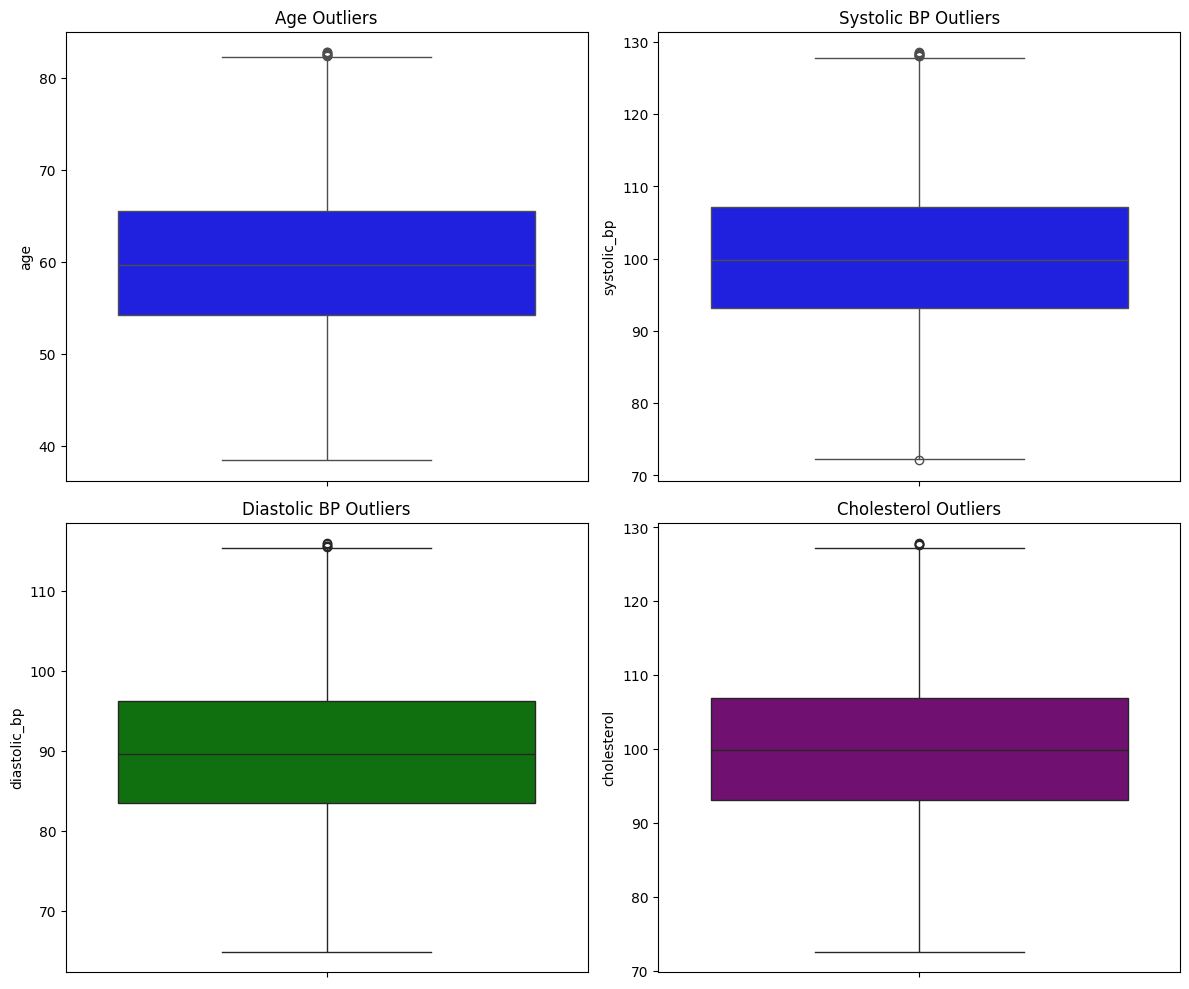

In [10]:
# Dataset reduced from 6000 to 5777 rows.
# We removed 223 outliers.

# Let's check Boxplot again.
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.boxplot(y=data_cleaned['age'], ax=axes[0, 0], color='blue').set(title='Age Outliers')
sns.boxplot(y=data_cleaned['systolic_bp'], ax=axes[0, 1], color='blue').set(title='Systolic BP Outliers')
sns.boxplot(y=data_cleaned['diastolic_bp'], ax=axes[1, 0], color='green').set(title='Diastolic BP Outliers')
sns.boxplot(y=data_cleaned['cholesterol'], ax=axes[1, 1], color='purple').set(title='Cholesterol Outliers')

plt.tight_layout()
plt.show()

# Data Preprocessing

In [11]:
data_cleaned['prognosis'].value_counts()

prognosis
retinopathy       2902
no_retinopathy    2875
Name: count, dtype: int64

In [46]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform the prognosis column
data_cleaned['prognosis'] = le.fit_transform(data_cleaned['prognosis'])

In [47]:
data_cleaned['prognosis'].value_counts()

prognosis
1    2902
0    2875
Name: count, dtype: int64

In [48]:
# Dropping the unnecessary column 'ID' as it 
data_cleaned = data_cleaned.drop(columns=['ID'])

In [49]:
data_cleaned

,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,77.196340,85.288742,80.021878,79.957109,1
1,63.529850,99.379736,84.852361,110.382411,1
2,69.003986,111.349455,109.850616,100.828246,1
3,82.638210,95.056128,79.666851,87.066303,1
4,78.346286,109.154591,90.713220,92.511770,1
...,...,...,...,...,...
5995,49.611850,94.857639,86.615671,107.643986,0
5996,63.099686,100.039527,93.515186,104.971404,1
5997,55.562243,98.421446,102.697875,120.875951,1
5998,63.468956,106.809289,88.060631,106.052213,1


In [50]:
data_cleaned['prognosis'].value_counts()

prognosis
1    2902
0    2875
Name: count, dtype: int64

# Visualization - Heatmap

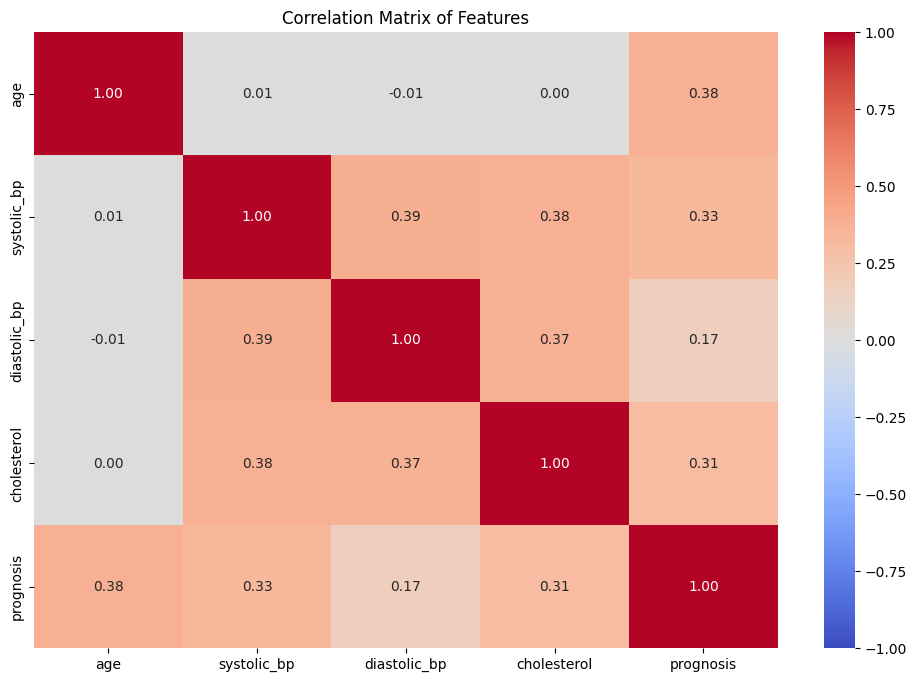

In [23]:
correlation_matrix = data_cleaned.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Features")
plt.show()

In [24]:
# Correlations observations:

# 'age' is most positively correlated with 'prognosis' meaning older patients are slightly more likely to have diabetic retinopathy.
# Followeed by 'systolic_bp'

# 'diastolic_bp' is least correlated with 'prognosis' meaning it might not be a strong predictor of diabetic retinopathy.

# Feature Scaling

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [52]:
# Separating features (X) and target variable (y)

X = data_cleaned.drop(columns=['prognosis'])  # Drop target column
y = data_cleaned['prognosis']  # Target variable

In [53]:
# Split into training (80%) and testing (20%) sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
y_train.value_counts()

prognosis
1    2317
0    2304
Name: count, dtype: int64

In [55]:
# Apply Standard Scaling (Z-score normalization)
sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# Print shape of training and testing sets
X_train_scaled.shape, X_test_scaled.shape

((4621, 4), (1156, 4))

In [20]:
# After Standard Scaling, each feature now has a mean of 0 and a standard deviation of 1.

# Model Building

# 1. Logistic Regression

In [30]:
# Import the Logistic Regression model

from sklearn.linear_model import LogisticRegression

In [31]:
# Initialize the model

log_reg = LogisticRegression(random_state=42)

In [32]:
# Train the model on the training set

log_reg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [33]:
# Predict on the testing set

y_pred = log_reg.predict(X_test_scaled)

In [34]:
# Evaluate the model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1": f1 }

print(metrics)

{'Accuracy': 0.7188581314878892, 'Precision': 0.7296819787985865, 'Recall': 0.705982905982906, 'F1': 0.7176368375325803}


In [35]:
print(conf_matrix)

[[418 153]
 [172 413]]


In [36]:
# Observations:

# Accuracy is 71% which is not good.
# Precision is slightly higher than Recall, meaning the model is better at avoiding false positives than capturing all true cases.
#True Negatives (418) → Correctly predicted as no retinopathy.
#False Positives (153) → Incorrectly predicted as having retinopathy.
#False Negatives (172) → Incorrectly predicted as no retinopathy.
#True Positives (413) → Correctly predicted as having retinopathy.

# 2. Lasso Logistic Regression (L1 Regularization)

In [37]:
# Helps feature selection by shrinking coefficients to zero.

In [38]:
# Initialize the Lasso model
log_reg_l1 = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)

# Train the model on the training set
log_reg_l1.fit(X_train_scaled, y_train)

LogisticRegression(penalty='l1', random_state=42, solver='liblinear')

In [39]:
# Predict on the testing set
y_pred_l1 = log_reg_l1.predict(X_test_scaled)

In [40]:
# Evaluate the model
accuracy_l1 = accuracy_score(y_test, y_pred_l1)
precision_l1 = precision_score(y_test, y_pred_l1)
recall_l1 = recall_score(y_test, y_pred_l1)
f1_l1 = f1_score(y_test, y_pred_l1)
conf_matrix = confusion_matrix(y_test, y_pred_l1)

metrics = {
    "Accuracy": accuracy_l1,
    "Precision": precision_l1,
    "Recall": recall_l1,
    "F1": f1_l1 }

print(metrics)

{'Accuracy': 0.7197231833910035, 'Precision': 0.7309734513274336, 'Recall': 0.705982905982906, 'F1': 0.7182608695652174}


In [41]:
print(conf_matrix)

[[419 152]
 [172 413]]


# 3. Ridge Logistic Regression (L2 Regularization)

In [42]:
# Penalizes large coefficients but doesn’t shrink them to zero.

In [43]:
# Initialize the Ridge model
log_reg_l2 = LogisticRegression(penalty='l2', solver='liblinear', random_state=42)

# Train the model on the training set
log_reg_l2.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [44]:
# Predict on the testing set
y_pred_l2 = log_reg_l2.predict(X_test_scaled)

In [45]:
# Evaluate the model
accuracy_l2 = accuracy_score(y_test, y_pred_l2)
precision_l2 = precision_score(y_test, y_pred_l2)
recall_l2 = recall_score(y_test, y_pred_l2)
f1_l2 = f1_score(y_test, y_pred_l2)
conf_matrix = confusion_matrix(y_test, y_pred_l2)

metrics = {
    "Accuracy": accuracy_l2,
    "Precision": precision_l2,
    "Recall": recall_l2,
    "F1": f1_l2 }

print(metrics)

{'Accuracy': 0.7188581314878892, 'Precision': 0.7296819787985865, 'Recall': 0.705982905982906, 'F1': 0.7176368375325803}


In [46]:
print(conf_matrix)

[[418 153]
 [172 413]]


In [47]:
# There's not much difference in Accuracy. We will move on to other methods.

# 4. Decision Tree Classifier

In [48]:
# Import the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [49]:
# Initialize the model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model on the training set
dt_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [50]:
# Predict on the testing set
y_pred_dt = dt_model.predict(X_test_scaled)

In [51]:
# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

metrics = {
    "Accuracy": accuracy_dt,
    "Precision": precision_dt,
    "Recall": recall_dt,
    "F1": f1_dt }

print(metrics)

{'Accuracy': 0.6548442906574394, 'Precision': 0.6625874125874126, 'Recall': 0.6478632478632479, 'F1': 0.6551426101987899}


In [52]:
print(conf_matrix_dt)

[[378 193]
 [206 379]]


In [53]:
# Performance is worse than Logistic Regression.
# Decision Tree Classifier is prone to overfitting, meaning it overly memorizes training data but generalizes poorly on the test data.
# Maybe this is happening.

In [27]:
# Hyperparameter Tuning for Decision Tree

from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],       # max_depth → Limits tree depth to prevent overfitting.
    'min_samples_split': [2, 5, 10],     # min_samples_split → Minimum samples required to split a node.
    'min_samples_leaf': [1, 2, 4],       # min_samples_leaf → Minimum samples required in a leaf node.
    'criterion': ['gini', 'entropy']     # criterion → Splitting strategy (gini vs entropy).
}

In [55]:
# Initialize Decision Tree
dt = DecisionTreeClassifier(random_state=42)

# Grid Search
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [56]:
# Get best parameters
best_params = grid_search.best_params_
best_params

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 10}

In [57]:
# Train best Decision Tree model
best_dt = DecisionTreeClassifier(**best_params, random_state=42)
best_dt.fit(X_train_scaled, y_train)

y_pred_best_dt = best_dt.predict(X_test_scaled)

In [59]:
# Evaluate the model
accuracy_best_dt = accuracy_score(y_test, y_pred_best_dt)
precision_best_dt = precision_score(y_test, y_pred_best_dt)
recall_best_dt = recall_score(y_test, y_pred_best_dt)
f1_best_dt = f1_score(y_test, y_pred_best_dt)
conf_matrix_best_dt = confusion_matrix(y_test, y_pred_best_dt)

metrics = {
    "Accuracy": accuracy_best_dt,
    "Precision": precision_best_dt,
    "Recall": recall_best_dt,
    "F1": f1_best_dt }

print(metrics)

{'Accuracy': 0.7015570934256056, 'Precision': 0.718978102189781, 'Recall': 0.6735042735042736, 'F1': 0.6954986760812003}


In [60]:
print(conf_matrix_best_dt)

[[417 154]
 [191 394]]


In [62]:
# Tuned Decision Tree Classifier (70.15%) results are better than the default Decision Tree Classifier (65.48%).
# At this point, Lasso Logistic Regression (71.97%) is the most accurate.

# 5. Random Forest Classifier

In [63]:
# Import the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1) # -1 uses all available CPU cores for parallel processing (faster training).

# Train the model on the training set
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [64]:
# Predict on the testing set
y_pred_rf = rf_model.predict(X_test_scaled)

In [65]:
# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

metrics = {
    "Accuracy": accuracy_rf,
    "Precision": precision_rf,
    "Recall": recall_rf,
    "F1": f1_rf }

print(metrics)

{'Accuracy': 0.7179930795847751, 'Precision': 0.7244367417677643, 'Recall': 0.7145299145299145, 'F1': 0.7194492254733219}


In [66]:
print(conf_matrix_rf)

[[412 159]
 [167 418]]


In [67]:
# Hyperparameter Tuning for Random Forest Classifier

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300],    # Number of trees in the forest (default=100). Try [50, 100, 200, 300].
    'max_depth': [5, 10, 20, None],         # Maximum depth of trees (default=None for full depth). Try [5, 10, 20, None].
    'min_samples_split': [2, 5, 10],        # Minimum samples to split a node (default=2). Try [2, 5, 10].
    'min_samples_leaf': [1, 2, 5],          # Minimum samples in a leaf node (default=1). Try [1, 2, 5].
    'criterion': ['gini', 'entropy']        # Function to measure quality of a split. Try ['gini', 'entropy'].
} 

In [68]:
# Initialize Random Forest Classifier
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Grid Search
grid_search_rf = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train_scaled, y_train)

C:\Users\kunal\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, None],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='accuracy')

In [69]:
# Get best parameters
best_params_rf = grid_search_rf.best_params_
best_params_rf

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [70]:
# Train best Random Forest Classifier model
best_rf = RandomForestClassifier(**best_params_rf, random_state=42)
best_rf.fit(X_train_scaled, y_train)
y_pred_best_rf = best_rf.predict(X_test_scaled)

In [71]:
# Evaluate the model
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
precision_best_rf = precision_score(y_test, y_pred_best_rf)
recall_best_rf = recall_score(y_test, y_pred_best_rf)
f1_best_rf = f1_score(y_test, y_pred_best_rf)
conf_matrix_best_rf = confusion_matrix(y_test, y_pred_best_rf)

metrics = {
    "Accuracy": accuracy_best_rf,
    "Precision": precision_best_rf,
    "Recall": recall_best_rf,
    "F1": f1_best_rf }

print(metrics)

{'Accuracy': 0.7179930795847751, 'Precision': 0.7221269296740995, 'Recall': 0.7196581196581197, 'F1': 0.7208904109589042}


In [72]:
print(conf_matrix_best_rf)

[[409 162]
 [164 421]]


# 6. Support Vector Machine (SVM) Classifier

In [57]:
from sklearn.svm import SVC

svm_model = SVC(random_state=42)

svm_model.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [58]:
y_pred_svm = svm_model.predict(X_test_scaled)

In [59]:
# Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

metrics = {
    "Accuracy": accuracy_svm,
    "Precision": precision_svm,
    "Recall": recall_svm,
    "F1": f1_svm }

print(metrics)

{'Accuracy': 0.726643598615917, 'Precision': 0.7291311754684838, 'Recall': 0.7316239316239316, 'F1': 0.7303754266211604}


In [60]:
print(conf_matrix_svm)

[[412 159]
 [157 428]]


In [61]:
# Define parameter grid
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1]
}

# Initialize SVM model
svm = SVC(random_state=42)

# Grid Search
grid_search_svm = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_svm.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto', 0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='accuracy')

In [62]:
# Get best parameters
best_params_svm = grid_search_svm.best_params_
best_params_svm

{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}

In [63]:
# Train best SVM model
best_svm = SVC(**best_params_svm, random_state=42)
best_svm.fit(X_train_scaled, y_train)
y_pred_best_svm = best_svm.predict(X_test_scaled)

In [64]:
# Evaluate the model
accuracy_best_svm = accuracy_score(y_test, y_pred_best_svm)
precision_best_svm = precision_score(y_test, y_pred_best_svm)
recall_best_svm = recall_score(y_test, y_pred_best_svm)
f1_best_svm = f1_score(y_test, y_pred_best_svm)
conf_matrix_best_svm = confusion_matrix(y_test, y_pred_best_svm)

metrics = {
    "Accuracy": accuracy_best_svm,
    "Precision": precision_best_svm,
    "Recall": recall_best_svm,
    "F1": f1_best_svm }

print(metrics)

{'Accuracy': 0.7309688581314879, 'Precision': 0.7275747508305648, 'Recall': 0.7487179487179487, 'F1': 0.7379949452401011}


In [65]:
print(conf_matrix_best_svm)

[[407 164]
 [147 438]]


In [40]:
from sklearn.metrics import classification_report

print("Test Set Classification Report:\n", classification_report(y_test, y_pred_best_svm))

Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.71      0.72       571
           1       0.73      0.75      0.74       585

    accuracy                           0.73      1156
   macro avg       0.73      0.73      0.73      1156
weighted avg       0.73      0.73      0.73      1156



# 7. K-Nearest Neighbors (KNN) Classifier

In [82]:
# Import the KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

# Initialize the model
knn_model = KNeighborsClassifier()

# Train the model on the training set
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [83]:
# Predict on the testing set
y_pred_knn = knn_model.predict(X_test_scaled)

In [84]:
# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

metrics = {
    "Accuracy": accuracy_knn,
    "Precision": precision_knn,
    "Recall": recall_knn,
    "F1": f1_knn }

print(metrics)

{'Accuracy': 0.6980968858131488, 'Precision': 0.7041522491349481, 'Recall': 0.6957264957264957, 'F1': 0.6999140154772141}


In [85]:
print(conf_matrix_knn)

[[400 171]
 [178 407]]


In [86]:
# Define parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],                   # Number of neighbors
    'weights': ['uniform', 'distance'],                    # 'uniform' → All neighbors have equal weight and 'distance' → Closer neighbors have more influence.
    'metric': ['euclidean', 'manhattan', 'minkowski']      # 'euclidean' (default), 'manhattan' (for grid-based distances) and 'minkowski' (generalized distance metric)
}

In [87]:
knn = KNeighborsClassifier()

grid_search_knn = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_knn.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11, 15],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [88]:
best_params_knn = grid_search_knn.best_params_
best_params_knn

{'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}

In [89]:
# Train best KNN model

best_knn = KNeighborsClassifier(**best_params_knn)

best_knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [90]:
y_pred_best_knn = best_knn.predict(X_test_scaled)

In [91]:
# Evaluate the model
accuracy_best_knn = accuracy_score(y_test, y_pred_best_knn)
precision_best_knn = precision_score(y_test, y_pred_best_knn)
recall_best_knn = recall_score(y_test, y_pred_best_knn)
f1_best_knn = f1_score(y_test, y_pred_best_knn)
conf_matrix_best_knn = confusion_matrix(y_test, y_pred_best_knn)

metrics = {
    "Accuracy": accuracy_best_knn,
    "Precision": precision_best_knn,
    "Recall": recall_best_knn,
    "F1": f1_best_knn }

print(metrics)

{'Accuracy': 0.7058823529411765, 'Precision': 0.7072758037225042, 'Recall': 0.7145299145299145, 'F1': 0.7108843537414966}


In [92]:
print(conf_matrix_best_knn)

[[398 173]
 [167 418]]


# 8. Gradient Boosting Classifier

In [93]:
from sklearn.ensemble import GradientBoostingClassifier

In [94]:
gbm_model = GradientBoostingClassifier(
    n_estimators=100,    # Number of boosting stages
    learning_rate=0.1,   # Step size at each iteration
    max_depth=3,         # Tree depth
    random_state=42
)

gbm_model.fit(X_train_scaled, y_train)

GradientBoostingClassifier(random_state=42)

In [95]:
y_pred_gbm = gbm_model.predict(X_test_scaled)

In [96]:
# Evaluate the model

accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
precision_gbm = precision_score(y_test, y_pred_gbm)
recall_gbm = recall_score(y_test, y_pred_gbm)
f1_gbm = f1_score(y_test, y_pred_gbm)
conf_matrix_gbm = confusion_matrix(y_test, y_pred_gbm)

metrics = {
    "Accuracy": accuracy_gbm,
    "Precision": precision_gbm,
    "Recall": recall_gbm,
    "F1": f1_gbm }

print(metrics)

{'Accuracy': 0.7205882352941176, 'Precision': 0.7243150684931506, 'Recall': 0.7230769230769231, 'F1': 0.7236954662104362}


# 9. XGBoost Classifier

In [97]:
from xgboost import XGBClassifier

In [98]:
xgb_model = XGBClassifier(
    n_estimators=100,          # Number of trees
    learning_rate=0.1,         # Shrinkage parameter
    max_depth=3,               # Depth of each tree
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'      # Avoids warning
)

xgb_model.fit(X_train_scaled, y_train)

C:\Users\kunal\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:57:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [99]:
y_pred_xgb = xgb_model.predict(X_test_scaled)

In [100]:
# Evaluate the model

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

metrics = {
    "Accuracy": accuracy_xgb,
    "Precision": precision_xgb,
    "Recall": recall_xgb,
    "F1": f1_xgb }

print(metrics)

{'Accuracy': 0.7119377162629758, 'Precision': 0.7164948453608248, 'Recall': 0.7128205128205128, 'F1': 0.7146529562982005}


# 10. LightGBM Classifier

In [101]:
from lightgbm import LGBMClassifier

In [102]:
lgbm_model = LGBMClassifier(
    n_estimators=100,          # Number of boosting rounds
    learning_rate=0.1,         # Step size at each iteration
    max_depth=-1,              # No limit on tree depth
    random_state=42
)

lgbm_model.fit(X_train_scaled, y_train)

[LightGBM] [Info] Number of positive: 2317, number of negative: 2304
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000231 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 4621, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501407 -> initscore=0.005627
[LightGBM] [Info] Start training from score 0.005627


LGBMClassifier(random_state=42)

In [103]:
y_pred_lgbm = lgbm_model.predict(X_test_scaled)

In [104]:
# Evaluate the model

accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
precision_lgbm = precision_score(y_test, y_pred_lgbm)
recall_lgbm = recall_score(y_test, y_pred_lgbm)
f1_lgbm = f1_score(y_test, y_pred_lgbm)
conf_matrix_lgbm = confusion_matrix(y_test, y_pred_lgbm)

metrics = {
    "Accuracy": accuracy_lgbm,
    "Precision": precision_lgbm,
    "Recall": recall_lgbm,
    "F1": f1_lgbm }

print(metrics)

{'Accuracy': 0.7102076124567474, 'Precision': 0.7090301003344481, 'Recall': 0.7247863247863248, 'F1': 0.716821639898563}


# 11. Multi-Layer Perceptron (MLP) Classifier

In [105]:
from sklearn.neural_network import MLPClassifier

In [106]:
mlp_model = MLPClassifier(
    hidden_layer_sizes=(100,),  # One hidden layer with 100 neurons
    activation='relu',  # ReLU activation function
    solver='adam',  # Optimizer
    alpha=0.0001,  # L2 regularization (to prevent overfitting)
    random_state=42,
    max_iter=500  # Number of training iterations
)

mlp_model.fit(X_train_scaled, y_train)

MLPClassifier(max_iter=500, random_state=42)

In [107]:
y_pred_mlp = mlp_model.predict(X_test_scaled)

In [108]:
# Evaluate the model

accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
precision_mlp = precision_score(y_test, y_pred_mlp)
recall_mlp = recall_score(y_test, y_pred_mlp)
f1_mlp = f1_score(y_test, y_pred_mlp)
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)

metrics = {
    "Accuracy": accuracy_mlp,
    "Precision": precision_mlp,
    "Recall": recall_mlp,
    "F1": f1_mlp }

print(metrics)

{'Accuracy': 0.7179930795847751, 'Precision': 0.7161936560934892, 'Recall': 0.7333333333333333, 'F1': 0.7246621621621622}


# Summary: Accuracy values

In [111]:
metric_list = ['Logistic Regression', 'Lasso', 'Ridge', 'Decision Tree', 'Random Forest', 'SVM', 'KNN', 'Gradient Boosting', 'XGBoost', 'LightGBM', 'MLP']
accuracy_values = [accuracy, accuracy_l1, accuracy_l2, accuracy_best_dt, accuracy_best_rf, accuracy_best_svm, accuracy_best_knn, accuracy_gbm, accuracy_xgb, accuracy_lgbm, accuracy_mlp]

final_metrics = pd.DataFrame( {"Metric_name": metric_list, "Accuracy": accuracy_values}, index=None)

final_metrics_sorted = final_metrics.sort_values(by="Accuracy", ascending=False)
final_metrics_sorted

,Metric_name,Accuracy
5,SVM,0.730969
7,Gradient Boosting,0.720588
1,Lasso,0.719723
0,Logistic Regression,0.718858
2,Ridge,0.718858
4,Random Forest,0.717993
10,MLP,0.717993
8,XGBoost,0.711938
9,LightGBM,0.710208
6,KNN,0.705882


C:\Users\kunal\AppData\Local\Temp\ipykernel_12072\925448334.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Accuracy", y="Metric_name", data=final_metrics_sorted, palette="viridis")


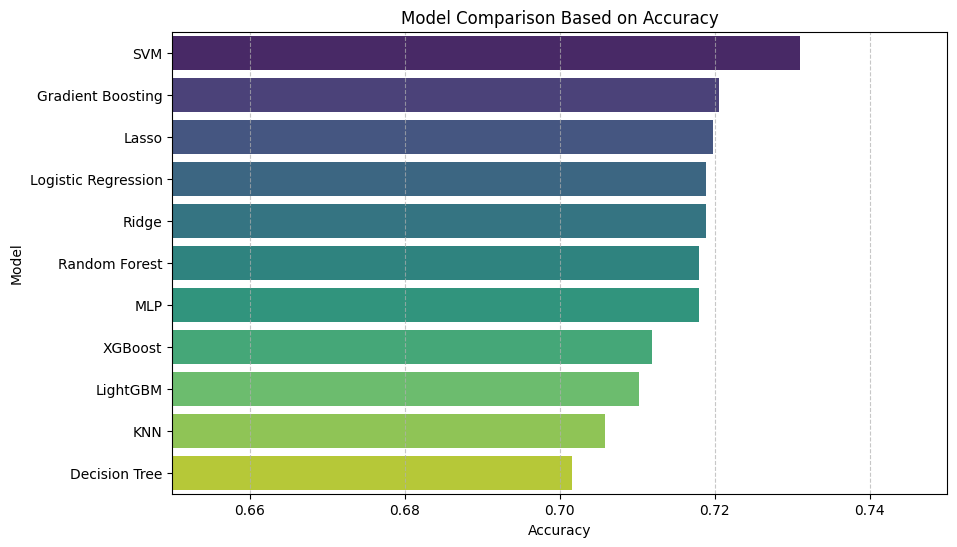

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x="Accuracy", y="Metric_name", data=final_metrics_sorted, palette="viridis")

# Adding labels and title
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.title("Model Comparison Based on Accuracy")
plt.xlim(0.65, 0.75)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

In [112]:
# Best model is SVM with an accuracy of 73.09%

In [113]:
print(conf_matrix_best_svm)

[[407 164]
 [147 438]]


In [114]:
# Confusion Matrix

#True Negatives (407) → Correctly predicted as no retinopathy.
#False Positives (164) → Incorrectly predicted as having retinopathy.
#False Negatives (147) → Incorrectly predicted as no retinopathy.
#True Positives (438) → Correctly predicted as having retinopathy.

# Model Deployment

In [69]:
import pickle

# Save the trained SVM model as a Scaler object
with open("svm_model.pkl", "wb") as file:       # Create a new file "svm_model.pkl" and open it in a write-binary mode.
    pickle.dump(best_svm, file)                # Save the trained model into this file.

with open("scaler.pkl", "wb") as file:
    pickle.dump(sc, file)                  # Save the Scaler Object into this file.